In [ ]:
# import libraries 
import pandas as pd # Import Pandas 
import numpy as np # Import Numpy f
import matplotlib.pyplot as plt # Import matplotlib for data visualization
import random
import seaborn as sns
from fbprophet import Prophet


In [ ]:
df = pd.read_csv("/content/multiTimeline.csv") #loading the csv file

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      261 non-null    datetime64[ns]
 1   y       261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [ ]:
df['ds'] = pd.to_datetime(df['ds']) #maling ds column as datetime

In [ ]:
pf = Prophet()
pf.fit(df) #fitting the model

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = pf.make_future_dataframe(200) #extending the dataframe to 200 days to forcast the trend
future.tail()

,ds
456,2022-07-03
457,2022-07-04
458,2022-07-05
459,2022-07-06
460,2022-07-07


In [ ]:
forecast = pf.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #yhat_upper and yhat_lower are uncertainty intervals and yhat forecast

,ds,yhat,yhat_lower,yhat_upper
456,2022-07-03,14.632587,4.922079,24.442042
457,2022-07-04,14.558168,4.702516,24.255634
458,2022-07-05,14.459597,4.995268,23.891879
459,2022-07-06,14.339551,4.766986,24.354345
460,2022-07-07,14.201281,4.655554,23.511097


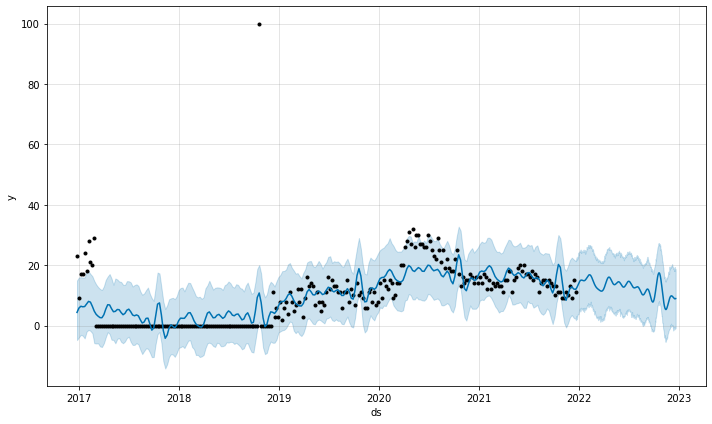

In [ ]:
fig1 = pf.plot(forecast) #black dot points are actual data points and blue line is pridicted

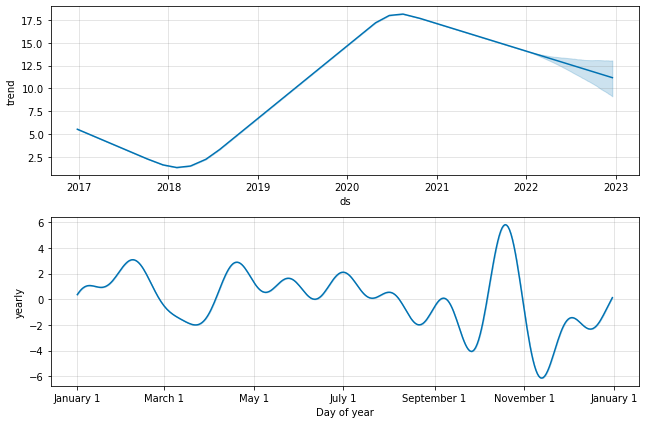

In [ ]:
fig2 = pf.plot_components(forecast)


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(pf, forecast)

In [ ]:
plot_components_plotly(pf, forecast)
